In [1]:
#Please pay attention that if the pure map of the field-of view is needed,the code is in the last module.In the main programme I combine the
#field-of-view and the clean image together as the final synthesis beam image.
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

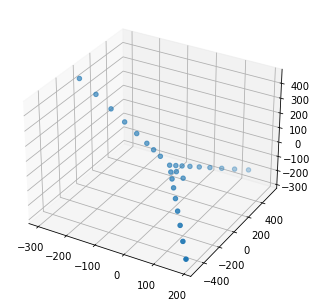

In [2]:
#The input of the position of telescopes and the calculation of the longest and shortest baseline.The figure of the antenna position is also showed
#in this module.
position=np.array([[76.69,11.67,-108.36],[49.29,-123.87,-67.42],[96.46,-248.46,-136.94],[156.49,-407.06,-225.51],[228.83,-597.84,-331.98],[311.96,-817.22,-454.39],[405.70,-1064.49,-592.36],[509.53,-1338.54,-745.23],[623.12,-1638.19,-912.51],[151.26,23.33,-218.44],[37.71,135.65,-50.59],[73.37,271.95,-103.23],[118.76,445.77,-170.46],
                   [173.02,653.27,-250.51],[235.66,893.16,-343.18],[305.29,1163.76,-448.46],[381.68,1463.33,-565.35],[465.79,1790.89,-692.95],[2.24,0.05,1.71],[-100.24,-15.93,152.45],[-174.91,-27.56,262.39],[-249.59,-39.15,372.31],[-361.68,-56.66,537.09],[-495.22,-77.43,733.79],[-645.82,-100.90,955.52],[-812.58,-126.88,1200.98],[-995.39,-155.53,1469.71]])*0.3
baseline=position[0]-position[1]
for i in range(0,25):
    if i==0:
        for j in range(2,27):
            delta=position[i]-position[j]
            baseline=np.vstack((baseline,delta))
    if i!=0 and i!= 25:
        for j in range(i+1,27):
            delta=position[i]-position[j]
            baseline=np.vstack((baseline,delta))
baseline=np.vstack((baseline,position[25]-position[26]))
BL=np.transpose(baseline)
baseline_length=np.array([])
for i in range(0,351):
    length=np.sqrt(baseline[i][0]**2+baseline[i][1]**2+baseline[i][2]**2)
    baseline_length=np.append(baseline_length,length)
maxlength=np.max(baseline_length)
minlength=np.min(baseline_length)
x=position[:,0]
y=position[:,1]
z=position[:,2]
antenna_figure=plt.figure()
ax=Axes3D(antenna_figure)
ax.scatter(x,y,z)

In [3]:
#Set up the hour angle array
H=np.array([])
for i in range(0,121):
    h=-0.5+i/120
    H=np.append(H,h)
HA=H*15

In [4]:
#Use the formula to calculate the u and v data of the two point sources.Number 1 data represent for source 1 and Number 2 data represent for 
#source 2.The same rule is also used on later calculation.Also the field of view and resolution are calculated in this module.The unit of them 
#are all arcsec.In the later calculation I set the resolution as 12arcsec and the field of view as 300arcsec for easy calculation.
wavelength=3e8/5e9
DEC1=45*3600
DEC2=(45+1/20)*3600
u1=(np.sin(HA[0])*BL[0]+np.cos(HA[0])*BL[1])/wavelength
v1=(-np.sin(DEC1)*np.cos(HA[0])*BL[0]+np.sin(DEC1)*np.sin(HA[0])*BL[1]+np.cos(DEC1)*BL[2])/wavelength
u2=(np.sin(HA[0])*BL[0]+np.cos(HA[0])*BL[1])/wavelength
v2=(-np.sin(DEC2)*np.cos(HA[0])*BL[0]+np.sin(DEC2)*np.sin(HA[0])*BL[1]+np.cos(DEC2)*BL[2])/wavelength
for i in range(1,len(HA)):
    u1=np.vstack((u1,(np.sin(HA[i])*BL[0]+np.cos(HA[i])*BL[1])/wavelength))
    v1=np.vstack((v1,(-np.sin(DEC1)*np.cos(HA[i])*BL[0]+np.sin(DEC1)*np.sin(HA[i])*BL[1]+np.cos(DEC1)*BL[2])/wavelength))
    u2=np.vstack((u2,(np.sin(HA[i])*BL[0]+np.cos(HA[i])*BL[1])/wavelength))
    v2=np.vstack((v2,(-np.sin(DEC2)*np.cos(HA[i])*BL[0]+np.sin(DEC2)*np.sin(HA[i])*BL[1]+np.cos(DEC2)*BL[2])/wavelength))
fov=3600*180*(wavelength/minlength)/np.pi
res=3600*180*(wavelength/maxlength)/np.pi
print(res,fov)

11.993179288030221 309.2628192254876


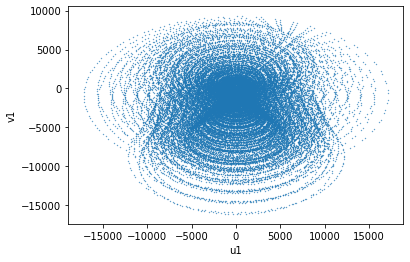

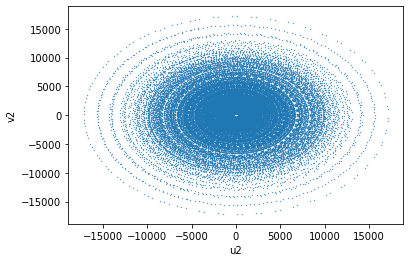

In [7]:
#The graph of 2 sources uv plane.
from matplotlib import pyplot as plt
plt.scatter(u1,v1,s=0.1)
plt.xlabel("u1")
plt.ylabel("v1")
plt.show()
uv2=plt.scatter(u2,v2,s=0.1)
plt.xlabel("u2")
plt.ylabel("v2")
plt.show()

In [6]:
#The calculation of the phase part.
phase1=(np.cos(DEC1)*np.cos(HA[0])*BL[0]-np.cos(DEC1)*np.sin(HA[0])*BL[1]+np.sin(DEC1)*BL[2])/wavelength
phase2=(np.cos(DEC2)*np.cos(HA[0])*BL[0]-np.cos(DEC2)*np.sin(HA[0])*BL[1]+np.sin(DEC2)*BL[2])/wavelength
for i in range(1,len(HA)):
    phase1=np.vstack((phase1,(np.cos(DEC1)*np.cos(HA[i])*BL[0]-np.cos(DEC1)*np.sin(HA[i])*BL[1]+np.sin(DEC1)*BL[2])/wavelength))
    phase2=np.vstack((phase2,(np.cos(DEC2)*np.cos(HA[i])*BL[0]-np.cos(DEC2)*np.sin(HA[i])*BL[1]+np.sin(DEC2)*BL[2])/wavelength))
real1=np.cos(2*np.pi*phase1)
real2=np.cos(2*np.pi*phase2)
imag1=np.sin(2*np.pi*phase1)
imag2=np.sin(2*np.pi*phase2)

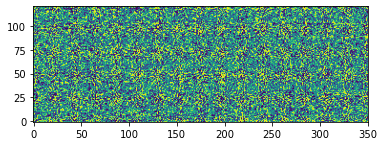

In [7]:
#The calculation of the "observed" data of the interferometer.
x1=50
y1=50
x2=50-12
y2=50+15
I1=3.6
I2=5.8
R1=I1*np.exp(2*np.pi*1j*(u1*x1+v1*y1+phase1))
R2=I2*np.exp(2*np.pi*1j*(u2*x2+v2*y2+phase2))
R1real=R1.real
R1imag=R1.imag
R2real=R2.real
R2imag=R2.imag 
#The codes below will show the image of the "observed" data.To get the specific image,make the line which can generate the image as the code and run.
plt.imshow(R1real,origin='lower')#Create the image of the real part of source 1 
#plt.imshow(R1imag,origin='lower')#Create the image of the imaginary part of source 1
#plt.imshow(R2real,origin='lower')#Create the image of the real part of source 2
#plt.imshow(R2imag,origin='lower')#Create the image of the imaginary part of source 2

In [8]:
#The simulate part of the sources using the given data.This module needs some time to calculate.
a=b=0
x=np.linspace(0,100,100)
y=np.linspace(0,100,100)
M=121*351
X,Y=np.meshgrid(x,y)
for i in range(0,121):
    for j in range(0,351):
        a=a+I1*np.exp(-2*np.pi*1j*((u1[i][j]*(X-x1))/M+v1[i][j]*(Y-y1)/M+phase1[i][j]/M))
        b=b+I2*np.exp(-2*np.pi*1j*((u2[i][j]*(X-x2))/M+v2[i][j]*(Y-y2)/M+phase2[i][j]/M))

The dimension of the primary beam is (100, 100)


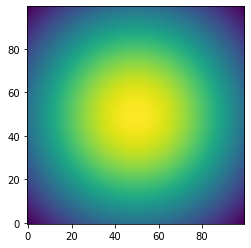

In [9]:
#The figure of the primary beam and the measurement of its dimension.This module needs some time to calculate.
sigma=2e-6
xx=np.linspace(-0.001,0.001,100)
yy=np.linspace(-0.001,0.001,100)
XX,YY=np.meshgrid(xx,yy)
primary_beam=np.exp(-(XX**2+YY**2)/sigma)
plt.imshow(primary_beam,origin='lower')
print('The dimension of the primary beam is',np.shape(primary_beam))

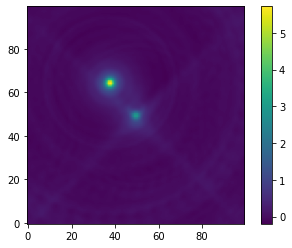

In [10]:
#The dirty image of the two sources together without set the wcs coordinate.
g=(a+b)*I2/np.max(b)
plt.imshow(g.real,origin='lower')
plt.colorbar()

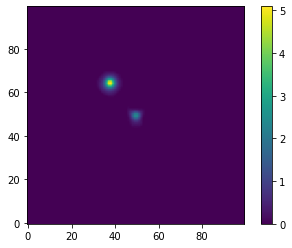

In [11]:
#The clean image of the two sources without set the wcs coordinate.
bg=g.real
figure=np.zeros((100,100))
while np.sum(bg)>1:
    x=np.where(bg==np.max(bg))[0][0]
    y=np.where(bg==np.max(bg))[1][0]
    figure[x][y]=figure[x][y]+np.max(g.real)/10
    bg[x][y]=0.9*np.max(g.real)
plt.imshow(figure,origin='lower')
plt.colorbar()

In [12]:
#The measurement of the position and intensity of two sources in the simulation map.
a=a*I1/np.max(a)
b=b*I2/np.max(b)
index1=np.unravel_index(a.real.argmax(),a.real.shape)
index2=np.unravel_index(b.real.argmax(),b.real.shape)
measurement1=np.max(a.real)
measurement2=np.max(b.real)
mx1=(75*3600+(index1[0]-50)*12)/(3600*15)
my1=(45*3600+(index1[1]-50)*12)/3600
mx2=(75*3600+(index2[0]-50)*12)/(3600*15)
my2=(45*3600+(index2[1]-50)*12)/3600
print('The intensity of source 1 is',measurement1,'Jy','and the position of it is',mx1,'h',my1,'°')
print('The intensity of source 2 is',measurement2,'Jy','and the position of it is',mx2,'h',my2,'°')

The intensity of source 1 is 3.6299087074544807 Jy and the position of it is 5.0 h 45.0 °
The intensity of source 2 is 5.799999999999999 Jy and the position of it is 5.003111111111111 h 44.96 °


In [14]:
#Setting the wcs coordinate through the resolution and the field of view and save the data and the coordinate as a fits file.
import numpy as np
from astropy import wcs
from astropy.io import fits
w = wcs.WCS(naxis=2)
w.wcs.crpix = [50,50]
w.wcs.cdelt = np.array([-12/3600,12/3600])
w.wcs.crval = [75, 45]
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
w.wcs.set_pv([(2, 1, 0)])
pixcrd = np.array([[0,0],[50, 50]], dtype=np.float64)
world = w.wcs_pix2world(pixcrd, 0)
pixcrd2 = w.wcs_world2pix(world, 0)
assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6
x=0
y=0
origin=0
assert(w.wcs_pix2world(x,y,origin)==w.wcs_pix2world(x+1,y+1,origin+1))
header=w.to_header()
#fits.writeto('D://interferometer_simulation.fits',header=header,data=figure)

The dimension of the synthesis beam is (100, 100)


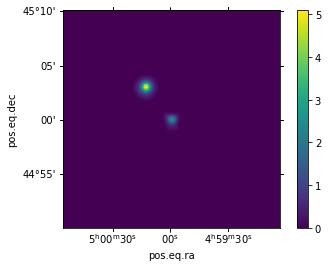

In [15]:
#Use the fits file for the final imaging and the measurement of its dimension.
from astropy.wcs import WCS
hdu=fits.open('D://interferometer_simulation.fits')[0]
wcs=WCS(hdu.header)
plt.subplot(projection=wcs)
plt.imshow(hdu.data,origin='lower')
plt.xlabel=('Galactic Longititude')
plt.ylabel=('Galactic Latitude')
plt.colorbar()
print('The dimension of the synthesis beam is',np.shape(hdu.data))

In [26]:
#If the single field of view image is need, please use the codes in this module to create it.
#test=np.zeros((100,100))
#plt.subplot(projection=wcs)
#plt.imshow(test)